<a href="https://colab.research.google.com/github/Mizgaan/-IIT_Ropar_Assignment-1-/blob/main/(Defect%20Tracking%20Using%20Open%20CV)Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data Analysis Phase
#Main Aim is to understnad more about the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
##Display all the columns in Data Frame

pd.pandas.set_option('display.max_columns',None)

# For prepocessing
from sklearn import preprocessing
# For Train Test Split
from sklearn.model_selection import train_test_split

# Importing Deep Learning Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import optimizers
from keras.utils import to_categorical

#For CNN
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten,Activation
import cv2  
from tqdm import tqdm
import os

# to copy files from one directory to another using copy function of shutil.`
from shutil import copy
import random as rn

Image similarity 0.8851601227556992


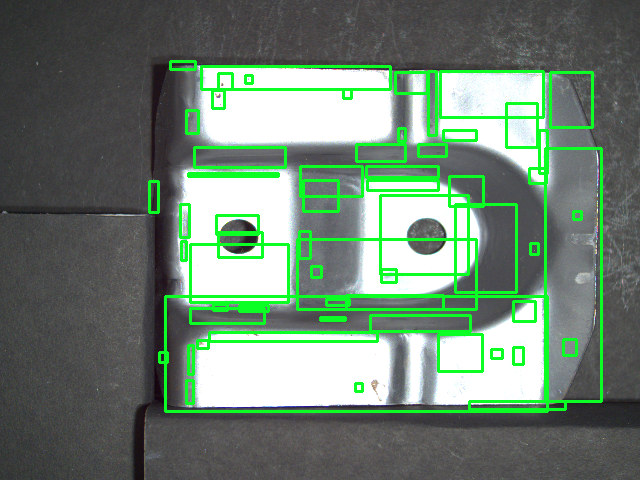

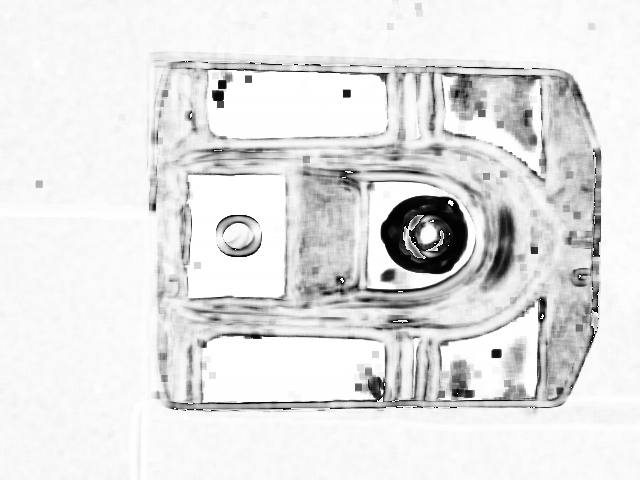

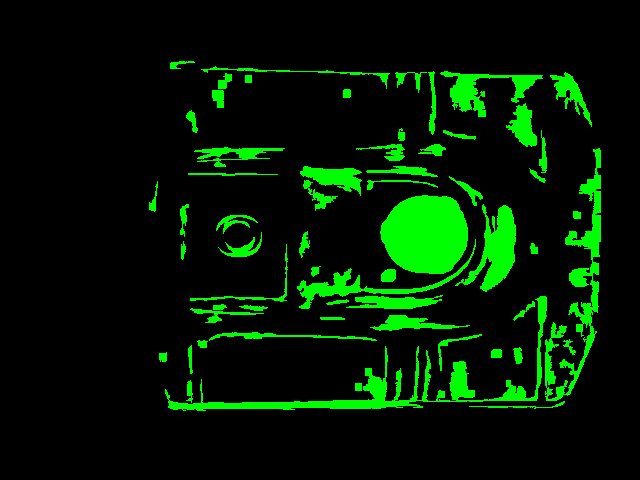

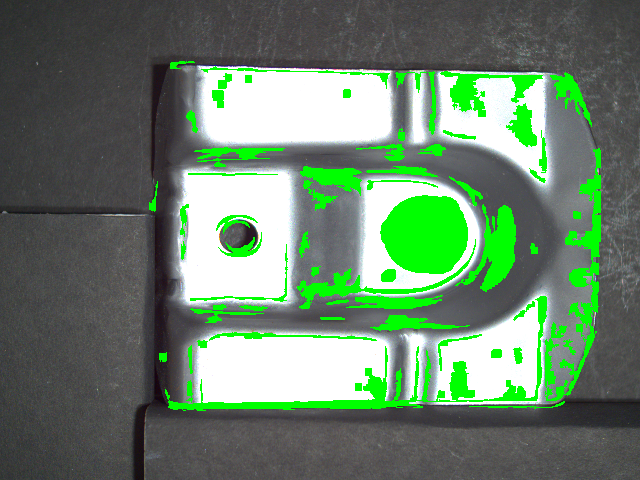

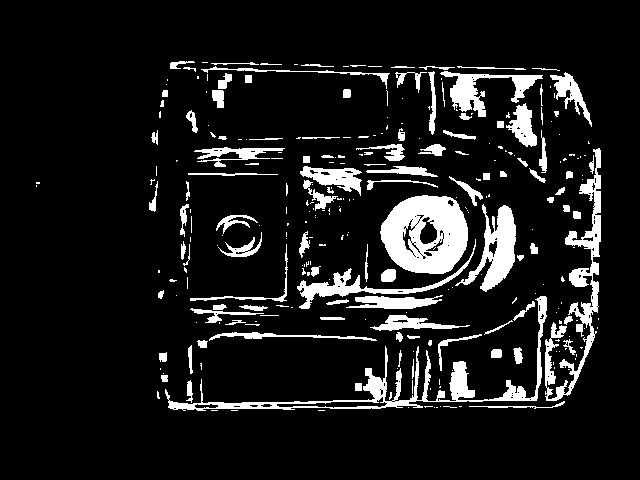

-1

In [6]:
from skimage.measure import compare_ssim
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


before_good = cv2.imread('/good_image.png')
after_bad = cv2.imread('/bad_image.png')

# Convert images to grayscale
before_gray = cv2.cvtColor(before_good, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_bad, cv2.COLOR_BGR2GRAY)

# training_set = train_datagen.flow_from_directory(before_gray,      
#                                     target_size = (224, 224),
#                                     batch_size = 16,
#                                     class_mode = 'binary')


# x1=np.array(before_gray)
# Compute SSIM between two images
(score, diff) = compare_ssim(before_gray, after_gray, full=True)
print("Image similarity", score)



# cv2.imshow('difference ',z3)
# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")


# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
# thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before_good.shape, dtype='uint8')
filled_after = after_bad.copy()

for c in contours:
#     print(c)
    area = cv2.contourArea(c)
    
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before_good, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after_bad, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)


cv2_imshow( after_bad)
cv2_imshow(diff)
cv2_imshow(mask)
cv2_imshow(filled_after)
cv2_imshow(thresh)

# store images
Good_image1=cv2.imwrite('diffOverGoodImage.png', before_good)
Bad_image1=cv2.imwrite('diffOverBadImage.png', after_bad)

cv2.waitKey(0)

# New Section